In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pdb
import pandas as pd
import numpy as np

from matplotlib import rc
rc('text', usetex=True)
import matplotlib.pyplot as plt
# %config InlineBackend.figure_format = 'svg'

import sys
if '../' not in sys.path:
    sys.path.insert(0,'../')
    
from parallel.parphase import compute
from solvers.visuals import plot_3d_phasediagram

Number of cores available: 32


/projects/academic/olgawodo/kiranvad/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
from solvers.visuals import plot_mpltern, plot_lifted_label_ternary

""" configure your material system """
dimensions = 3
M = np.array([100,5,1])
chi = [0.35,0.75,0.88]
configuration = {'M': M, 'chi':chi}
dx = 400
output, simplices, grid, num_comps = compute(dimensions, configuration, dx,
                                             flag_refine_simplices=True, flag_lift_label=True)

""" Post-processing """
ax, cbar = plot_mpltern(grid, simplices, num_comps)
plt.savefig('../figures/meshsize/{}.png'.format(dx),dpi=500, bbox_inches='tight')
plt.close()
ax, cbar = plot_lifted_label_ternary(output)
plt.savefig('../figures/meshsize/pointcloud_{}.png'.format(dx),dpi=500, bbox_inches='tight')
plt.close()

2020-06-30 17:47:12,632	INFO resource_spec.py:212 -- Starting Ray with 555.96 GiB memory available for workers and up to 186.26 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).
2020-06-30 17:47:12,971	INFO services.py:1170 -- View the Ray dashboard at localhost:8265


3-dimensional grid generated at 18.67s


KeyboardInterrupt: 

Exception ignored in: 'ray._raylet.get_py_stack'
Traceback (most recent call last):
  File "/projects/academic/olgawodo/kiranvad/anaconda3/lib/python3.7/inspect.py", line 1507, in currentframe
    def currentframe():
KeyboardInterrupt


Energy computed at 1286.56s
Convexhull is computed at 1287.37s


KeyboardInterrupt: 

Total of 4 3-phase simplices


IndexError: index 4 is out of bounds for axis 0 with size 4

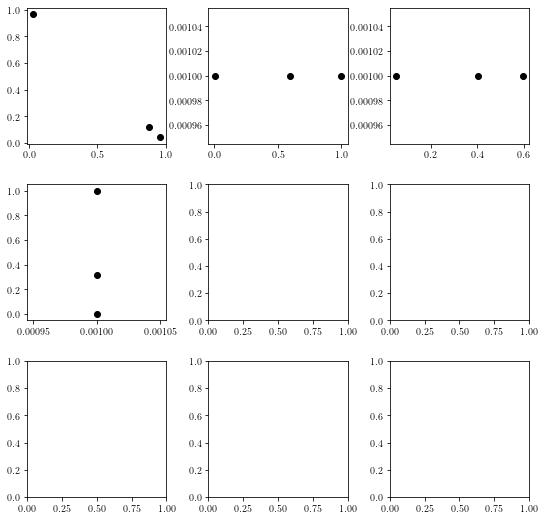

In [4]:
from solvers import helpers
from scipy.spatial.distance import euclidean

def plot_debug_phases(grid, simplices, num_comps):
    phaseid = 3
    criteria = (np.asarray(num_comps) ==phaseid)
    fig, axs = plt.subplots(3,3, figsize=(9,9))
    plt.subplots_adjust(hspace=0.3,wspace=0.3)
    axs = axs.reshape(9)
    print('Total of {} 3-phase simplices'.format(np.sum(criteria)))
    #coords = np.asarray([helpers.get_ternary_coords(pt) for pt in grid.T])
    coords = grid.T
    for i, ax in enumerate(axs):
        triangle = simplices[criteria][i]
        tri_coords = np.asarray([coords[x,:] for x in triangle])
        ax.scatter(tri_coords[:,0],tri_coords[:,1],c='k')
        ax.add_patch(plt.Polygon(tri_coords[:,:-1])) 
#         ax.set_xlim([-0.1,1.1])
#         ax.set_ylim([-0.1,1.1])
        
    thresh = 5*euclidean(grid[:,0],grid[:,1])
    
#     words = [r'$\varphi_{1}$',r'$\varphi_{2}$',r'$\varphi_{3}$']
#     xs = [-0.15,1,0.5]
#     ys = [0,0,np.sqrt(3)/2+0.01]
#     for x, y, s in zip(xs,ys,words):
#         ax.text(x,y,s,fontsize=20)

#     plt.axis('off')
    
    fig.suptitle('{} Phase region simplices. Threshold : {:.2f}'.format(phaseid, thresh))
    
    # dummy axis for labels
    fig.add_subplot(111, frameon=False)
    plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
    plt.xlabel(r"$\varphi_1$", fontsize=20)
    plt.ylabel(r"$\varphi_2$", fontsize=20, labelpad = 30)

    return ax 

ax = plot_debug_phases(grid, simplices, num_comps)
plt.show()

2020-06-25 16:00:29,477	ERROR worker.py:700 -- Calling ray.init() again after it has already been called.


Number of cores available: 40


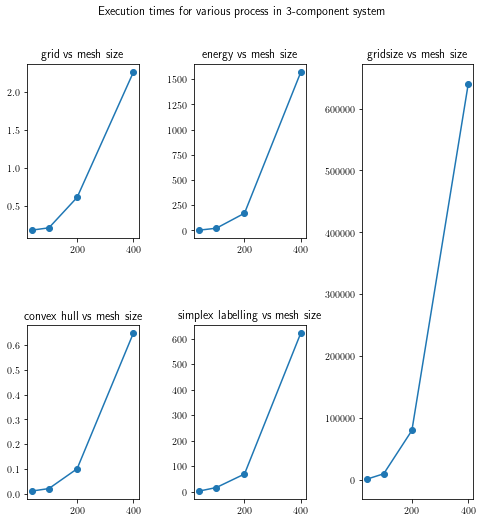

In [9]:
# plot run times for seperate computations
runtimes = np.array([[0.18,0.21,0.61,2.26],[2.94,21.46,170.86,1574.035],
                     [2.95,21.48,170.96,1574.685],[5.13,37.38,239.94,2197.57],[1275,10000,79999,639990]])
execution_times = np.array([runtimes[0], runtimes[1]-runtimes[0],runtimes[2]-runtimes[1],runtimes[3]-runtimes[2], runtimes[4]])
rownames = ['grid','energy','convex hull','simplex labelling','gridsize']
columns = [40,100,200,400]

fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(8,8))
gs = axs[1, 1].get_gridspec()
# remove the underlying axes
for ax in axs[:, -1]:
    ax.remove()
axbig = fig.add_subplot(gs[:, -1])
axs = np.append(axs[:,:2].reshape(4),axbig)
for i, ax in enumerate(axs):
        ax.scatter(columns,execution_times[i],marker='o')
        ax.plot(columns,execution_times[i])
        ax.set_title('{} vs mesh size'.format(rownames[i]))

fig.subplots_adjust(hspace=0.5, wspace=0.5)
fig.suptitle('Execution times for various process in 3-component system')
plt.show()

In [ ]:
execution_times.shape